In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mtimg
import tensorflow
import keras
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Convolution2D , MaxPooling2D, Dropout, Flatten, Input
from imgaug import augmenters as iaa
from keras.optimizers import Adam
import cv2
import random
import ntpath
import os
import glob

In [16]:
tensorflow.__version__

'2.18.0'

In [17]:
keras.__version__

'3.8.0'

In [2]:
columns = ["center","left","right","steering","throttle","reverse","speed"]
df = pd.read_csv("driving_log.csv",names = columns)
pd.set_option('display.max_colwidth',None)

In [3]:
df.head()

,center,left,right,steering,throttle,reverse,speed
0,C:\Users\HP\Downloads\simulator-windows-64\data\IMG\center_2025_10_01_20_42_21_264.jpg,C:\Users\HP\Downloads\simulator-windows-64\data\IMG\left_2025_10_01_20_42_21_264.jpg,C:\Users\HP\Downloads\simulator-windows-64\data\IMG\right_2025_10_01_20_42_21_264.jpg,0.0,0.0,0,0.000080
1,C:\Users\HP\Downloads\simulator-windows-64\data\IMG\center_2025_10_01_20_42_21_369.jpg,C:\Users\HP\Downloads\simulator-windows-64\data\IMG\left_2025_10_01_20_42_21_369.jpg,C:\Users\HP\Downloads\simulator-windows-64\data\IMG\right_2025_10_01_20_42_21_369.jpg,0.0,0.0,0,0.000079
2,C:\Users\HP\Downloads\simulator-windows-64\data\IMG\center_2025_10_01_20_42_21_472.jpg,C:\Users\HP\Downloads\simulator-windows-64\data\IMG\left_2025_10_01_20_42_21_472.jpg,C:\Users\HP\Downloads\simulator-windows-64\data\IMG\right_2025_10_01_20_42_21_472.jpg,0.0,0.0,0,0.000079
3,C:\Users\HP\Downloads\simulator-windows-64\data\IMG\center_2025_10_01_20_42_21_576.jpg,C:\Users\HP\Downloads\simulator-windows-64\data\IMG\left_2025_10_01_20_42_21_576.jpg,C:\Users\HP\Downloads\simulator-windows-64\data\IMG\right_2025_10_01_20_42_21_576.jpg,0.0,0.0,0,0.000082
4,C:\Users\HP\Downloads\simulator-windows-64\data\IMG\center_2025_10_01_20_42_21_680.jpg,C:\Users\HP\Downloads\simulator-windows-64\data\IMG\left_2025_10_01_20_42_21_680.jpg,C:\Users\HP\Downloads\simulator-windows-64\data\IMG\right_2025_10_01_20_42_21_680.jpg,0.0,0.0,0,0.000078


In [65]:
df.shape

(8390, 7)

In [66]:
df["center"][0]

'C:\\Users\\HP\\Downloads\\simulator-windows-64\\data\\IMG\\center_2025_10_01_20_42_21_264.jpg'

In [6]:
cd = df.copy()

In [7]:
cd["center"] = cd["center"].str.replace(r".*IMG\\", "", regex=True)
cd["left"] = cd["left"].str.replace(r".*IMG\\","",regex = True)
cd["right"] = cd["right"].str.replace(r".*IMG\\","",regex = True)

In [69]:
cd.head()

,center,left,right,steering,throttle,reverse,speed
0,center_2025_10_01_20_42_21_264.jpg,left_2025_10_01_20_42_21_264.jpg,right_2025_10_01_20_42_21_264.jpg,0.0,0.0,0,0.000080
1,center_2025_10_01_20_42_21_369.jpg,left_2025_10_01_20_42_21_369.jpg,right_2025_10_01_20_42_21_369.jpg,0.0,0.0,0,0.000079
2,center_2025_10_01_20_42_21_472.jpg,left_2025_10_01_20_42_21_472.jpg,right_2025_10_01_20_42_21_472.jpg,0.0,0.0,0,0.000079
3,center_2025_10_01_20_42_21_576.jpg,left_2025_10_01_20_42_21_576.jpg,right_2025_10_01_20_42_21_576.jpg,0.0,0.0,0,0.000082
4,center_2025_10_01_20_42_21_680.jpg,left_2025_10_01_20_42_21_680.jpg,right_2025_10_01_20_42_21_680.jpg,0.0,0.0,0,0.000078


In [70]:
cd.duplicated().sum()

0

In [71]:
cd.isna().sum()

center      0
left        0
right       0
steering    0
throttle    0
reverse     0
speed       0
dtype: int64

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


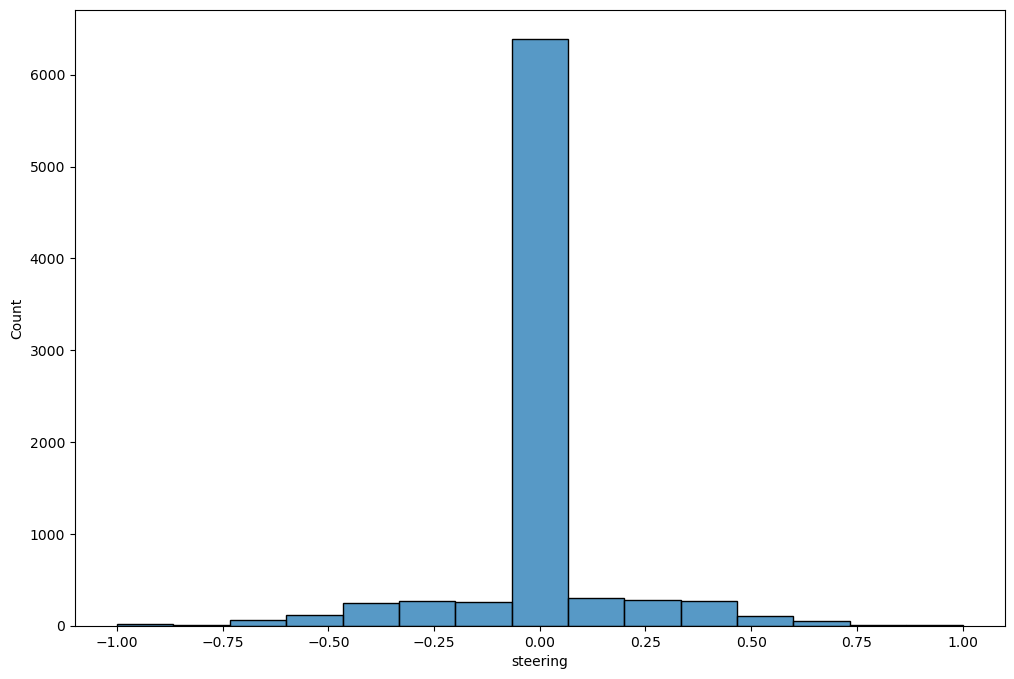

In [38]:
# It show the data more move towards the 0 the balance the data

plt.figure(figsize = (12,8))
sns.histplot(cd["steering"])
plt.show()

In [39]:
cd["steering"].value_counts(ascending=False)

steering
 0.000000    6099
 1.000000       9
-1.000000       8
 0.127363       2
 0.437996       1
             ... 
-0.409249       1
-0.373692       1
-0.023995       1
-0.114980       1
-0.155072       1
Name: count, Length: 2276, dtype: int64

In [74]:
# zero = cd[cd["steering"] == 0].sample(500,replace = False)

In [75]:
#zero.duplicated().sum()

In [76]:
# non_zero = cd[cd["steering"] != 0]

In [77]:
# cd = np.vstack((zero,non_zero))

In [78]:
# cd = pd.DataFrame(cd,columns = df.columns)

In [79]:
cd

,center,left,right,steering,throttle,reverse,speed
0,center_2025_10_01_20_42_21_264.jpg,left_2025_10_01_20_42_21_264.jpg,right_2025_10_01_20_42_21_264.jpg,0.0,0.0,0,0.000080
1,center_2025_10_01_20_42_21_369.jpg,left_2025_10_01_20_42_21_369.jpg,right_2025_10_01_20_42_21_369.jpg,0.0,0.0,0,0.000079
2,center_2025_10_01_20_42_21_472.jpg,left_2025_10_01_20_42_21_472.jpg,right_2025_10_01_20_42_21_472.jpg,0.0,0.0,0,0.000079
3,center_2025_10_01_20_42_21_576.jpg,left_2025_10_01_20_42_21_576.jpg,right_2025_10_01_20_42_21_576.jpg,0.0,0.0,0,0.000082
4,center_2025_10_01_20_42_21_680.jpg,left_2025_10_01_20_42_21_680.jpg,right_2025_10_01_20_42_21_680.jpg,0.0,0.0,0,0.000078
...,...,...,...,...,...,...,...
8385,center_2025_10_01_22_36_33_690.jpg,left_2025_10_01_22_36_33_690.jpg,right_2025_10_01_22_36_33_690.jpg,0.0,0.0,0,27.396390
8386,center_2025_10_01_22_36_33_802.jpg,left_2025_10_01_22_36_33_802.jpg,right_2025_10_01_22_36_33_802.jpg,0.0,0.0,0,27.121350
8387,center_2025_10_01_22_36_33_914.jpg,left_2025_10_01_22_36_33_914.jpg,right_2025_10_01_22_36_33_914.jpg,0.0,0.0,0,26.794590
8388,center_2025_10_01_22_36_34_018.jpg,left_2025_10_01_22_36_34_018.jpg,right_2025_10_01_22_36_34_018.jpg,0.0,0.0,0,26.522710


C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


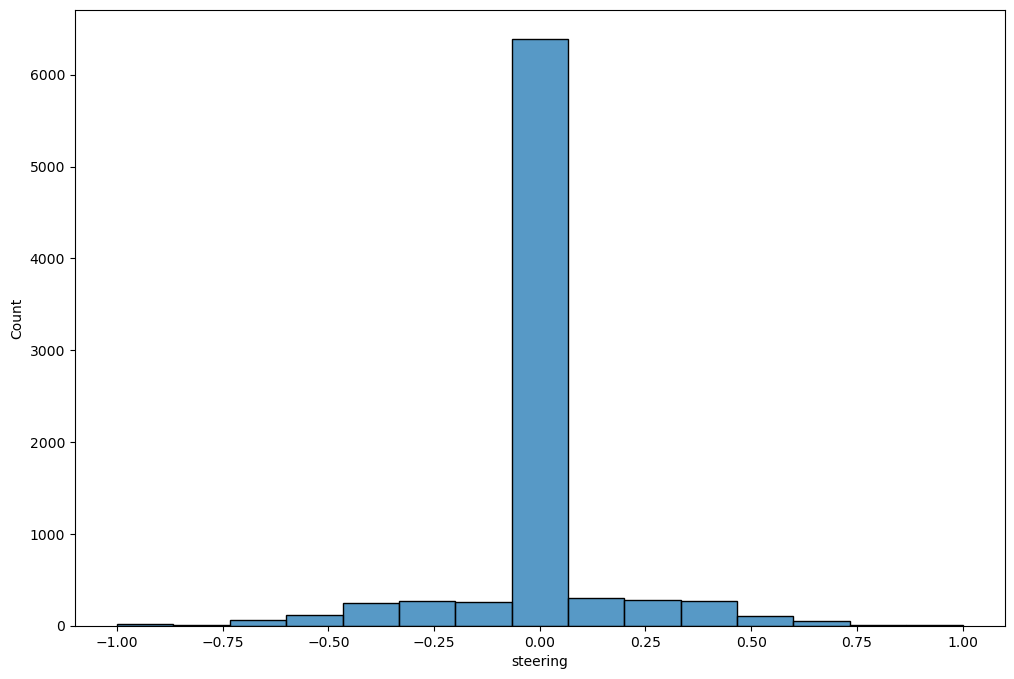

In [40]:
plt.figure(figsize = (12,8))
sns.histplot(cd["steering"])
plt.show()

In [97]:
def load_image(data, df):
    image_path = []
    steering = []
    for i in range(len(df)):   # ✔️ ab df use kiya
        index_data = df.iloc[i]
        center, left, right = index_data[0], index_data[1], index_data[2]

        # center image
        image_path.append(os.path.join(data, center.strip()))
        steering.append(float(index_data[3]))

        # left image
        image_path.append(os.path.join(data, left.strip()))
        steering.append(float(index_data[3]))

        # right image
        image_path.append(os.path.join(data, right.strip()))
        steering.append(float(index_data[3])) 
    image_path = np.asarray(image_path)
    steering = np.asarray(steering)
    return image_path, steering

In [98]:
img_folder = r"C:\Users\HP\practice of ML\Self_driving_car\IMG"

In [99]:
img_folder = r"C:\Users\HP\practice of ML\Self_driving_car\IMG"

# yaha cd dataframe hai jisme 4 columns hai: center, left, right, steering
image_path, steering = load_image(img_folder, cd)


C:\Users\HP\AppData\Local\Temp\ipykernel_8792\590456629.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  center, left, right = index_data[0], index_data[1], index_data[2]
C:\Users\HP\AppData\Local\Temp\ipykernel_8792\590456629.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  steering.append(float(index_data[3]))
C:\Users\HP\AppData\Local\Temp\ipykernel_8792\590456629.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  steeri

In [100]:
len(steering)

25170

In [101]:
len(image_path)

25170

In [102]:
x_train, x_test, y_train, y_test = train_test_split(image_path, steering, test_size = 0.2, random_state = 42)

In [103]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((20136,), (20136,), (5034,), (5034,))

In [48]:
#plt.figure(figsize = (12,8))
#sns.histplot(x_train)
#plt.show()

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


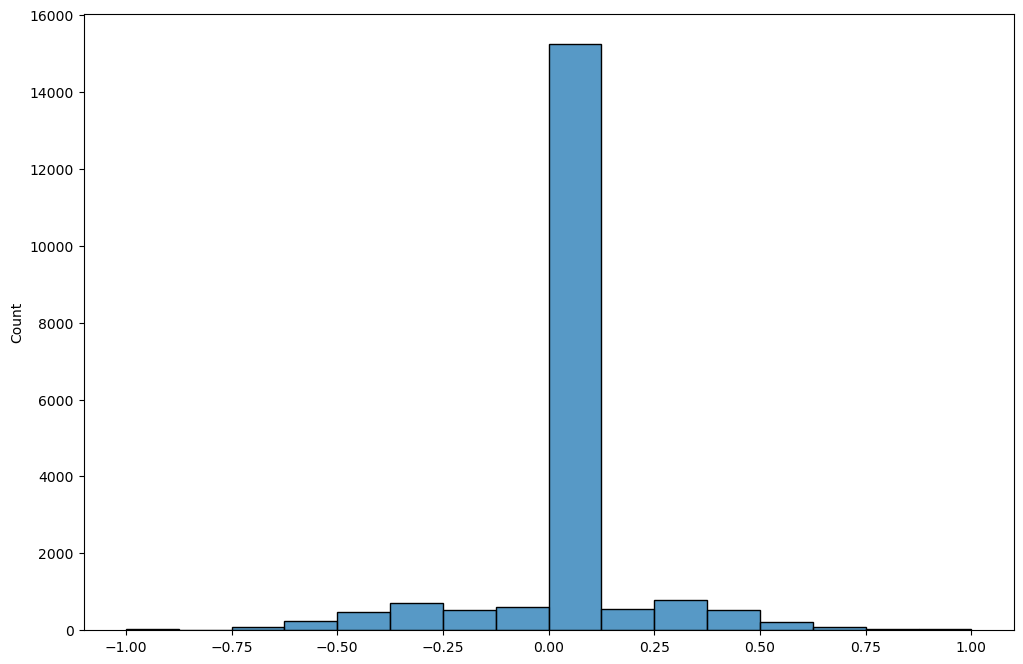

In [104]:
plt.figure(figsize = (12,8))
sns.histplot(y_train)
plt.show()

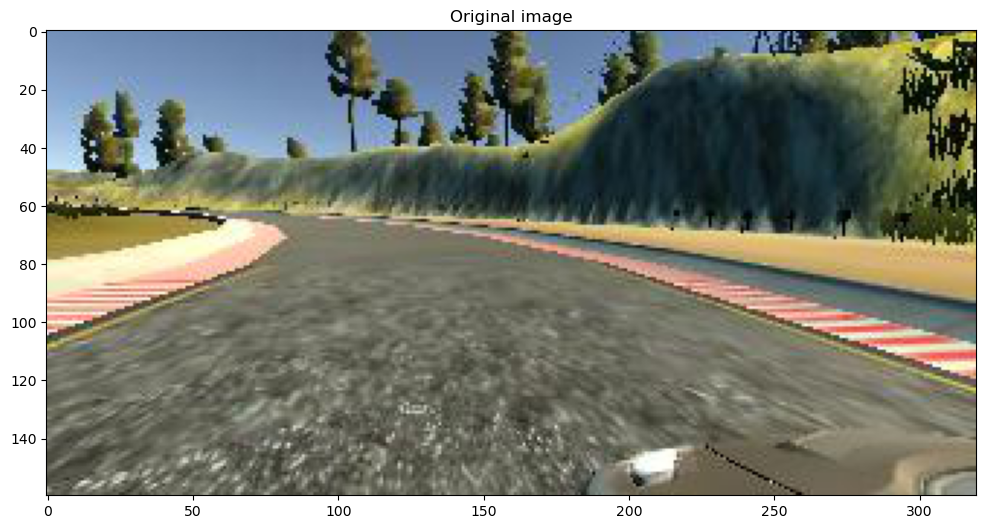

In [105]:
plt.figure(figsize = (12,8))
image = image_path[100]           
original_img = mtimg.imread(image) 
plt.imshow(original_img)          
plt.title("Original image")  
plt.show()


In [106]:
def prep(image):
    img = image[60:135,:,:]
    img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
    #img = cv2.GaussianBlur(img, (3,3), 0)
    img = cv2.resize(img, (200,66))
    img = img / 255
    return img

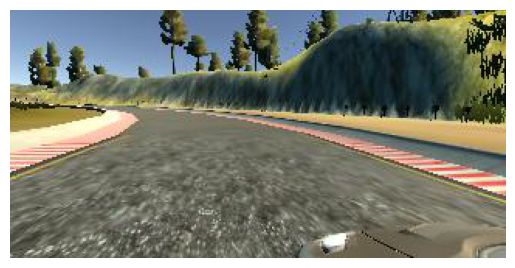

In [52]:
image = image_path[100]           
original_img = mtimg.imread(image) 

plt.imshow(original_img)          
plt.axis("off")                  
plt.show()


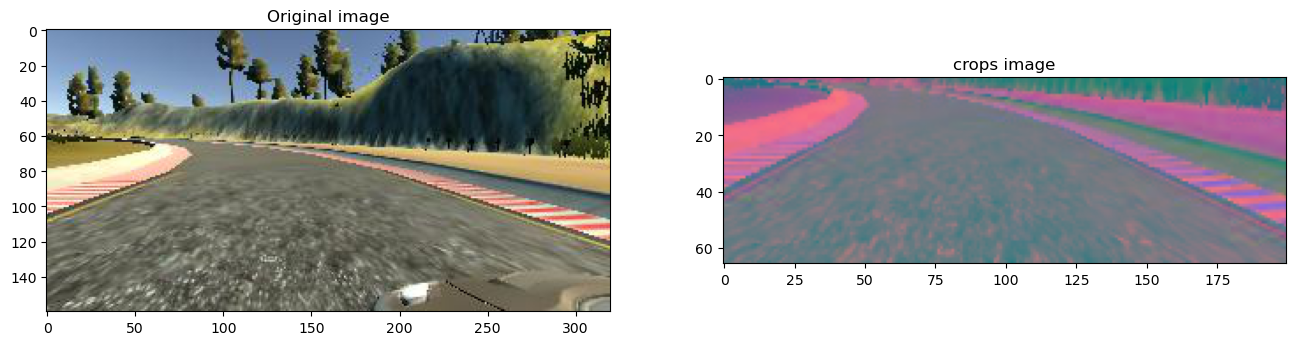

In [57]:
fig , axs = plt.subplots(1,2, figsize = (16,4))
image = image_path[100]           
original_img = mtimg.imread(image) 
crops = prep(original_img)

axs[0].imshow(original_img)          
axs[0].set_title("Original image")  
axs[1].imshow(crops)
axs[1].set_title("crops image")
plt.show()


In [58]:
def zoom(img):
    zoom = iaa.Affine(scale = (1,1.3))
    img = zoom.augment_image(img)
    return img

image = image_path[random.randint(0,9000)]
show = mtimg.imread(image)
zoom_image = zoom(show)

Text(0.5, 1.0, 'zoomed image')

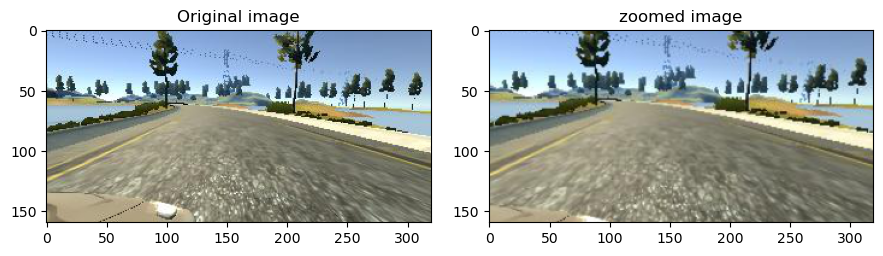

In [59]:
fig, axs = plt.subplots(1,2, figsize = (9,12))
fig.tight_layout()

axs[0].imshow(show)
axs[0].set_title("Original image")

axs[1].imshow(zoom_image)
axs[1].set_title("zoomed image")

In [60]:
def pan(img):
    pan = iaa.Affine(translate_percent = {"x" : (-0.1, 0.1), "y": (-0.1,0.1)})
    image = pan.augment_image(img)
    return img

image = image_path[random.randint(0,9000)]

In [108]:
def final_arg(img_path, steering_ang, batch_size, isTraining):
    while True:
        batch_img = []
        batch_steering = []

        for i in range(batch_size):
            random_index = random.randint(0, len(img_path) - 1)

            # ✅ Load image
            image = plt.imread(img_path[random_index])
            steering = steering_ang[random_index]

            if isTraining:
                # Augmentations apply randomly
                if np.random.rand() < 0.5:   
                    image = zoom(image)
                if np.random.rand() < 0.5:   
                    image = pan(image)

            im = prep(image)

            batch_img.append(im)
            batch_steering.append(steering)

        yield (np.asarray(batch_img), np.asarray(batch_steering))

In [63]:
print(mtimg.imread(x_train[0]))

[[[123 152 194]
  [123 152 194]
  [122 151 193]
  ...
  [201 187 158]
  [206 195 165]
  [208 197 167]]

 [[123 152 194]
  [123 152 194]
  [123 152 194]
  ...
  [206 192 163]
  [207 196 166]
  [206 197 166]]

 [[124 153 195]
  [124 153 195]
  [123 152 194]
  ...
  [200 186 157]
  [194 183 153]
  [188 179 148]]

 ...

 [[ 95  96  82]
  [109 110  96]
  [119 120 106]
  ...
  [166 169 152]
  [159 162 145]
  [158 161 144]]

 [[108 109  95]
  [100 101  87]
  [ 93  94  80]
  ...
  [168 171 154]
  [161 164 147]
  [169 172 155]]

 [[108 109  95]
  [113 114 100]
  [113 114 100]
  ...
  [158 161 144]
  [154 157 140]
  [162 165 148]]]


In [84]:
x_train_gen, y_train_gen = next(final_arg(x_train, y_train, 10, 1))
x_test_gen, y_test_gen = next(final_arg(x_test, y_test, 1, 0))

In [85]:
y_train_gen

array([ 0.        ,  0.        ,  0.        ,  0.        , -0.5217543 ,
        0.        ,  0.        , -0.04599239,  0.        ,  0.        ])

Text(0.5, 1.0, 'Testing')

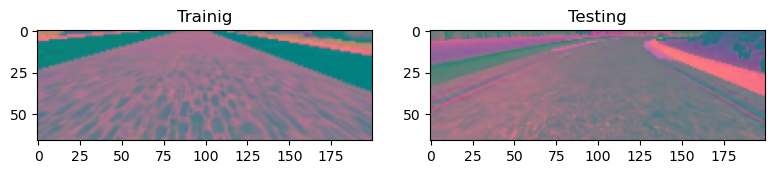

In [86]:
fig, axs = plt.subplots(1, 2, figsize = (8,12))
fig.tight_layout()

axs[0].imshow(x_train_gen[0])
axs[0].set_title("Trainig")

axs[1].imshow(x_test_gen[0])
axs[1].set_title("Testing")

In [87]:
x_train.shape

(20136,)

In [88]:
model = Sequential()
model.add(Input(shape = (66,200,3)))
model.add(Conv2D(24, kernel_size = (5,5), strides = (2,2), activation = "elu"))
model.add(Conv2D(36, kernel_size = (5,5), strides = (2,2), activation = "elu"))
model.add(Conv2D(48, kernel_size = (5,5), strides = (2,2), activation = "elu"))
model.add(Conv2D(64, kernel_size = (5,5), activation = "elu"))

model.add(Flatten())
model.add(Dense(100, activation = "elu"))
model.add(Dense(50,activation = "elu"))
model.add(Dense(10,activation = "elu"))
model.add(Dense(1))

In [89]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)                   │ (None, 31, 98, 24)          │           1,824 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 14, 47, 36)          │          21,636 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 5, 22, 48)           │          43,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 1, 18, 64)           │          76,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 100)                 │         115,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 10)                  │             510 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 264,443 (1.01 MB)

 Trainable params: 264,443 (1.01 MB)

 Non-trainable params: 0 (0.00 B)

In [92]:
model.compile(loss = "mse", optimizer = "Adam")

In [94]:
history = model.fit(
    final_arg(x_train, y_train, 500, 1),   # generator
    steps_per_epoch = 300,
    epochs = 10,
    validation_data = final_arg(x_test, y_test, 300, 0),  # generator
    validation_steps = 200, 
    verbose = 1,
    shuffle = True
)

Epoch 1/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1406s 5s/step - loss: 0.0421 - val_loss: 0.0289
Epoch 2/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1388s 5s/step - loss: 0.0299 - val_loss: 0.0269
Epoch 3/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1178s 4s/step - loss: 0.0272 - val_loss: 0.0246
Epoch 4/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1092s 4s/step - loss: 0.0247 - val_loss: 0.0244
Epoch 5/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1129s 4s/step - loss: 0.0237 - val_loss: 0.0230
Epoch 6/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1126s 4s/step - loss: 0.0227 - val_loss: 0.0241
Epoch 7/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1188s 4s/step - loss: 0.0224 - val_loss: 0.0228
Epoch 8/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1319s 4s/step - loss: 0.0223 - val_loss: 0.0231
Epoch 9/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1394s 5s/step - loss: 0.0214 - val_loss: 0.0224
Epoch 10/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1299s 4s/step - loss: 0.0214 - val_loss: 0.0224


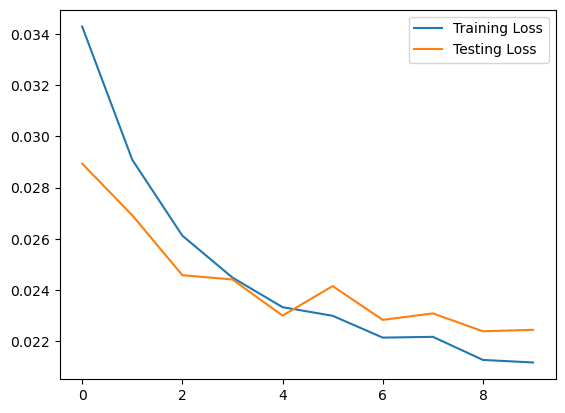

In [95]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.legend(["Training Loss","Testing Loss"])
plt.show()

In [96]:
# 1️⃣ Model save karna
model.save("model_7.h5")  # ye notebook ke current working directory me save ho jayega

# 2️⃣ (Optional) File ka path dekhna
import os
print("Saved at:", os.path.abspath("model_7.h5"))

Saved at: C:\Users\HP\practice of ML\Self_driving_car\model_7.h5


In [109]:
"""# Convert all image paths to numpy arrays
x_train_array = np.array([load_and_prep(p) for p in x_train], dtype=np.float32)
y_train_array = np.array(y_train, dtype=np.float32)

x_test_array = np.array([load_and_prep(p) for p in x_test], dtype=np.float32)
y_test_array = np.array(y_test, dtype=np.float32)

print(x_train_array.shape, y_train_array.shape)
print(x_test_array.shape, y_test_array.shape)"""

'# Convert all image paths to numpy arrays\nx_train_array = np.array([load_and_prep(p) for p in x_train], dtype=np.float32)\ny_train_array = np.array(y_train, dtype=np.float32)\n\nx_test_array = np.array([load_and_prep(p) for p in x_test], dtype=np.float32)\ny_test_array = np.array(y_test, dtype=np.float32)\n\nprint(x_train_array.shape, y_train_array.shape)\nprint(x_test_array.shape, y_test_array.shape)'